# Interactions/Stability Evaluation (InSty)

This example shows how to perform Interactions/Stability Evaluation
(**InSty**) analysis for a small protein (<200 residues) called tyrosine
phosphatase LMW-PTP (**5KQM**) and visualize the results using Matplotlib_
library and VMD_ program. 
In the tutorial, we will use already preapared structure for
simulation (with hydrogens added). The same structure will be later
analyzed with the trajectory file to show how the analysis of interactions 
in the course of simulation can change. 

The tutorial will also include an example of a PDB structure directly
downloaded from Protein Data Bank (PDB) which requires adding the missing hydrogen
atoms to the protein and ligand structure. The analysis will be performed for
protein-ligand interactions.


# Analysis of interactions for a single PDB structure

We start by parsing PDB file with LMW-PTP **5kqm_all_sci.pdb** which is avalable
as the tutorial files. PDB file contains protein structures with water and 
counter ions prepared using VMD_ program.

Before that import everything from the ProDy packages.

In [1]:
import matplotlib
from prody import *
import numpy as np

In [2]:
PDBfile = '5kqm_all_sci.pdb'
coords = parsePDB(PDBfile)
coords

@> 19321 atoms and 1 coordinate set(s) were parsed in 0.18s.


<AtomGroup: 5kqm_all_sci (19321 atoms)>

For the analysis we will use only protein coordinates (*atoms*):

In [3]:
atoms = parsePDB(PDBfile).select('protein')
atoms

@> 19321 atoms and 1 coordinate set(s) were parsed in 0.18s.


<Selection: 'protein' from 5kqm_all_sci (2425 atoms)>

# Compute all types of interactions

In the next step, we instantiate an :class:`.Interactions` instance:

In [4]:
interactions = Interactions()

Now we can compute all available types of interactions (seven types: hydrogen
bonds, salt bridges, repulsive ionic bonding, Pi-cation, Pi-stacking,
hydrphobic interactions, and disulfide bonds) for protein structure by passing
selected atoms (*atoms*) to :meth:`.Interactions.calcProteinInteractions` method:

In [5]:
all_interactions = interactions.calcProteinInteractions(atoms)

@> Calculating interations.
@> Calculating hydrogen bonds.
@>      DONOR (res chid atom)   <--->       ACCEPTOR (res chid atom)    Distance  Angle
@>     ARG101    P      NH1_1516  <--->      ASP98    P      OD1_1463     2.0    33.1
@>      HSE72    P      NE2_1042  <--->      ASN15    P       OD1_165     2.6    34.8
@>     GLN143    P      NE2_2192  <--->     GLU139    P      OE2_2126     2.7     9.2
@>      HSE66    P       NE2_957  <--->     GLU139    P      OE1_2125     2.7     6.4
@>      ARG40    P         N_561  <--->       LYS6    P          O_37     2.7    17.1
@>      ARG58    P         N_813  <--->      ASP56    P       OD1_788     2.7    30.0
@>      ALA45    P         N_634  <--->      ARG75    P        O_1097     2.8    35.1
@>      ASN53    P       ND2_747  <--->      GLU50    P       OE1_708     2.8    18.2
@>      ALA74    P        N_1064  <--->      ASN53    P         O_751     2.8    21.3
@>      ASP56    P         N_780  <--->      ILE16    P         O_189     2.8  

@>     ARG150    P        N_2287  <--->     VAL146    P        O_2240     3.1    12.7
@>      LYS28    P         N_364  <--->      ALA24    P         O_303     3.1    20.0
@>     VAL141    P        N_2143  <--->     ASP137    P        O_2093     3.1    18.5
@>      ASP98    P        N_1455  <--->      SER94    P        O_1397     3.1    19.6
@>      LEU96    P        N_1412  <--->      ASP92    P        O_1371     3.1    36.3
@>      ALA22    P         N_269  <--->      ARG18    P         O_224     3.1    21.9
@>     ALA151    P        N_2311  <--->     ARG147    P        O_2264     3.1    15.6
@>      GLY67    P         N_963  <--->      LYS64    P         O_921     3.1    22.8
@>      ASP42    P         N_601  <--->       VAL8    P          O_64     3.1    35.6
@>      ARG65    P         N_922  <--->      SER61    P         O_871     3.1    23.4
@>      TRP39    P         N_537  <--->      SER36    P         O_507     3.1    15.2
@>     LYS123    P        N_1859  <--->     ASP120    

All types of interactions will be displayed on the screen with all types of
information such as distance or angle (if applied).

Moreover, we will have access to the details of each interaction type
using the following methods: 

:meth:`.Interactions.getHydrogenBonds` - hydrogen bonds:

In [6]:
interactions.getHydrogenBonds()

[['ARG101', 'NH1_1516', 'P', 'ASP98', 'OD1_1463', 'P', 1.998, 33.1238],
 ['HSE72', 'NE2_1042', 'P', 'ASN15', 'OD1_165', 'P', 2.5997, 34.752],
 ['GLN143', 'NE2_2192', 'P', 'GLU139', 'OE2_2126', 'P', 2.7287, 9.1823],
 ['HSE66', 'NE2_957', 'P', 'GLU139', 'OE1_2125', 'P', 2.7314, 6.3592],
 ['ARG40', 'N_561', 'P', 'LYS6', 'O_37', 'P', 2.7479, 17.1499],
 ['ARG58', 'N_813', 'P', 'ASP56', 'OD1_788', 'P', 2.7499, 29.9737],
 ['ALA45', 'N_634', 'P', 'ARG75', 'O_1097', 'P', 2.7609, 35.0983],
 ['ASN53', 'ND2_747', 'P', 'GLU50', 'OE1_708', 'P', 2.7702, 18.2336],
 ['ALA74', 'N_1064', 'P', 'ASN53', 'O_751', 'P', 2.7782, 21.3375],
 ['ASP56', 'N_780', 'P', 'ILE16', 'O_189', 'P', 2.7793, 27.0481],
 ['LYS110', 'NZ_1667', 'P', 'THR84', 'O_1240', 'P', 2.7977, 38.2213],
 ['LEU116', 'N_1758', 'P', 'CYS90', 'O_1342', 'P', 2.8072, 15.0239],
 ['SER103', 'N_1546', 'P', 'LEU99', 'O_1485', 'P', 2.8075, 29.107],
 ['ASN134', 'N_2045', 'P', 'ASP137', 'OD2_2091', 'P', 2.8132, 22.562],
 ['PHE152', 'N_2321', 'P', 'CYS148

:meth:`.Interactions.getSaltBridges` - salt bridges (residues with oposite
charges):

In [7]:
interactions.getSaltBridges()

[['HSE66', 'NE2_957', 'P', 'GLU139', 'OE1_2125_2126', 'P', 2.8359],
 ['ASP81', 'OD1_1193_1194', 'P', 'ARG75', 'NH1_1090_1093', 'P', 2.9163],
 ['ASP32', 'OD1_443_444', 'P', 'LYS28', 'NZ_380', 'P', 3.037],
 ['ASP98', 'OD1_1463_1464', 'P', 'ARG101', 'NH1_1516_1519', 'P', 3.0699],
 ['ARG27', 'NH1_356_359', 'P', 'GLU23', 'OE1_290_291', 'P', 3.7148],
 ['ARG65', 'NH1_938_941', 'P', 'GLU139', 'OE1_2125_2126', 'P', 3.7799],
 ['ASP98', 'OD1_1463_1464', 'P', 'LYS102', 'NZ_1540', 'P', 3.9359],
 ['ARG58', 'NH1_829_832', 'P', 'ASP56', 'OD1_788_789', 'P', 3.9486],
 ['ASP92', 'OD1_1368_1369', 'P', 'ARG18', 'NH1_217_220', 'P', 4.0693],
 ['GLU114', 'OE1_1735_1736', 'P', 'LYS112', 'NZ_1699', 'P', 4.0787],
 ['ARG147', 'NH1_2257_2260', 'P', 'ASP120', 'OD1_1824_1825', 'P', 4.1543],
 ['LYS110', 'NZ_1667', 'P', 'ASP86', 'OD1_1269_1270', 'P', 4.1879],
 ['GLU114', 'OE1_1735_1736', 'P', 'HSE157', 'NE2_2418', 'P', 4.3835],
 ['ASP129', 'OD1_1978_1979', 'P', 'ARG18', 'NH1_217_220', 'P', 4.5608],
 ['ARG75', 'NH1_109

:meth:`.Interactions.getRepulsiveIonicBonding` - repulsive ionic bonding
(between residues with the same charges):

In [8]:
interactions.getRepulsiveIonicBonding()

[['ARG101', 'NH1_1516_1519', 'P', 'LYS102', 'NZ_1540', 'P', 4.2655]]

:meth:`.Interactions.getPiStacking` - Pi-stacking interactions:

In [9]:
interactions.getPiStacking()

[['TYR142',
  '2166_2167_2169_2171_2174_2176',
  'P',
  'HSE66',
  '953_954_955_957_959',
  'P',
  3.8882,
  162.1245],
 ['TYR119',
  '1802_1803_1805_1807_1810_1812',
  'P',
  'HSE157',
  '2414_2415_2416_2418_2420_2423_2424',
  'P',
  4.3605,
  3.0062],
 ['TRP39',
  '549_550_551_553_555_557',
  'P',
  'PHE26',
  '327_328_330_332_334_336',
  'P',
  4.8394,
  75.4588],
 ['TYR132',
  '2024_2025_2027_2029_2032_2034',
  'P',
  'TYR131',
  '2003_2004_2006_2008_2011_2013',
  'P',
  4.8732,
  91.4358]]

:meth:`.Interactions.getPiCation` - Pi-cation:

In [10]:
interactions.getPiCation()

[['PHE85',
  '1248_1249_1251_1253_1255_1257',
  'P',
  'ARG40',
  'NH1_577_580',
  'P',
  3.6523],
 ['HSE66', '953_954_955_957_959', 'P', 'ARG65', 'NH1_938_941', 'P', 4.5323],
 ['HSE157',
  '2414_2415_2416_2418_2420_2423_2424',
  'P',
  'LYS112',
  'NZ_1699',
  'P',
  4.828]]

:meth:`.Interactions.getHydrophohic` - hydrophobic interactions:

In [11]:
interactions.getHydrophobic()

[['TYR87', 'OH_1286', 'P', 'ALA156', 'CB_2401', 'P', 3.0459],
 ['MET63', 'CE_894', 'P', 'ALA24', 'CB_298', 'P', 3.3105],
 ['ILE68', 'CG2_976', 'P', 'MET63', 'CE_894', 'P', 3.3306],
 ['TYR142', 'CZ_2171', 'P', 'VAL146', 'CG2_2235', 'P', 3.4815],
 ['ALA22', 'CB_273', 'P', 'PHE10', 'CD1_92', 'P', 3.5334],
 ['TRP39', 'CZ2_555', 'P', 'LYS6', 'CD_26', 'P', 3.5427],
 ['PHE26', 'CE2_336', 'P', 'VAL30', 'CG1_411', 'P', 3.5603],
 ['ALA111', 'CB_1677', 'P', 'ILE88', 'CD_1307', 'P', 3.5627],
 ['VAL11', 'CG2_114', 'P', 'ILE88', 'CG2_1300', 'P', 3.6386],
 ['VAL41', 'CG2_595', 'P', 'PHE26', 'CD2_334', 'P', 3.6448],
 ['PHE152', 'CE1_2331', 'P', 'ALA156', 'CB_2401', 'P', 3.6594],
 ['VAL106', 'CG2_1598', 'P', 'LYS79', 'CG_1155', 'P', 3.6828],
 ['ILE77', 'CD_1128', 'P', 'LEU99', 'CD2_1480', 'P', 3.6917],
 ['PHE82', 'CD1_1205', 'P', 'ILE88', 'CD_1307', 'P', 3.692],
 ['LEU116', 'CD2_1771', 'P', 'ILE127', 'CD_1949', 'P', 3.7057],
 ['VAL8', 'CG1_55', 'P', 'PHE26', 'CE2_336', 'P', 3.7106],
 ['LEU115', 'CD1_17

:meth:`.Interactions.getDisulfideBonds` - disulfide bonds:

In [12]:
interactions.getDisulfideBonds()

[]

To display residues with the biggest number of potential interactions and their
types, we can use :meth:`.Interactions.getFrequentInteractions` method:

In [13]:
frequent_interactions = interactions.getFrequentInteractors(contacts_min=3)

@> The most frequent interactions between:
@> LEU9P  <--->  hp:ALA44P  hp:PHE85P  hb:LEU89P
@> CYS12P  <--->  hb:ASN15P  hb:SER19P  hb:THR46P
@> ARG18P  <--->  hb:ALA22P  sb:ASP92P  sb:ASP129P
@> PHE26P  <--->  hp:VAL8P  hb:VAL30P  ps:TRP39P  hp:VAL41P
@> MET63P  <--->  hp:ILE21P  hp:ILE68P  hp:MET70P
@> ASP81P  <--->  hb:ARG75P  hb:THR78P  hb:PHE85P
@> THR84P  <--->  hb:SER7P  hb:ARG40P  hb:LYS110P
@> ASP86P  <--->  hb:SER7P  sb:LYS110P  hb:LYS112P
@> ILE88P  <--->  hp:VAL11P  hp:PHE82P  hp:ALA111P  hb:GLU114P
@> ASP92P  <--->  hb:ARG18P  hb:ASN95P  hb:LEU96P
@> LYS102P  <--->  sb:ASP98P  rb:ARG101P  hb:GLN105P
@> LYS112P  <--->  hb:ILE88P  sb:GLU114P  pc:HSE157P
@> ASP120P  <--->  hb:LYS123P  hb:GLN124P  sb:ARG147P
@> ILE127P  <--->  hb:ARG18P  hp:MET91P  hp:LEU116P  hp:VAL141P
@> Legend: hb-hydrogen bond, sb-salt bridge, rb-repulsive ionic bond, ps-Pi stacking interaction,pc-Cation-Pi interaction, hp-hydrophobic interaction, dibs-disulfide bonds
@> The biggest number of interactions

The value of *contacts_min* can be modified to display residues with smaller
number of interactions.

# Visualize interactions in VMD

We can generate tcl files for visualizing each type of interaction with VMD_ 
using the :func:`.showProteinInteractions_VMD` function in the following way:

In [14]:
showProteinInteractions_VMD(atoms, interactions.getHydrogenBonds(), color='blue', filename='HBs.tcl')
showProteinInteractions_VMD(atoms, interactions.getSaltBridges(), color='yellow',filename='SBs.tcl')
showProteinInteractions_VMD(atoms, interactions.getRepulsiveIonicBonding(), color='red',filename='RIB.tcl')
showProteinInteractions_VMD(atoms, interactions.getPiStacking(), color='green',filename='PiStacking.tcl') 
showProteinInteractions_VMD(atoms, interactions.getPiCation(), color='orange',filename='PiCation.tcl') 
showProteinInteractions_VMD(atoms, interactions.getHydrophobic(), color='silver',filename='HPh.tcl') 
showProteinInteractions_VMD(atoms, interactions.getDisulfideBonds(), color='black',filename='DiBs.tcl') 

@> TCL file saved
@> TCL file saved
@> TCL file saved
@> TCL file saved
@> TCL file saved
@> TCL file saved
@> Lack of results
@> TCL file saved


A TCL file will be saved and can be used in VMD_ after uploading the PDB file
with protein structure **5kqm_all_sci.pdb** and by running the following command 
line instruction in the VMD_ *TKConsole* (*VMD Main*) for Linux, Windows and Mac users: 

::  play HBs.tcl

The tcl file contains a method for drawing lines between selected pairs of 
residues. Those residues are also displayed.

# Additional selections

From the predicted interactions we can select only interactions assigned to
a certain regions, chains or between different chains.

We can compute them by adding additional parameters to the selected
function. See examples below:

In [15]:
interactions.getSaltBridges(selection='chain P')

[['HSE66', 'NE2_957', 'P', 'GLU139', 'OE1_2125_2126', 'P', 2.8359],
 ['ASP81', 'OD1_1193_1194', 'P', 'ARG75', 'NH1_1090_1093', 'P', 2.9163],
 ['ASP32', 'OD1_443_444', 'P', 'LYS28', 'NZ_380', 'P', 3.037],
 ['ASP98', 'OD1_1463_1464', 'P', 'ARG101', 'NH1_1516_1519', 'P', 3.0699],
 ['ARG27', 'NH1_356_359', 'P', 'GLU23', 'OE1_290_291', 'P', 3.7148],
 ['ARG65', 'NH1_938_941', 'P', 'GLU139', 'OE1_2125_2126', 'P', 3.7799],
 ['ASP98', 'OD1_1463_1464', 'P', 'LYS102', 'NZ_1540', 'P', 3.9359],
 ['ARG58', 'NH1_829_832', 'P', 'ASP56', 'OD1_788_789', 'P', 3.9486],
 ['ASP92', 'OD1_1368_1369', 'P', 'ARG18', 'NH1_217_220', 'P', 4.0693],
 ['GLU114', 'OE1_1735_1736', 'P', 'LYS112', 'NZ_1699', 'P', 4.0787],
 ['ARG147', 'NH1_2257_2260', 'P', 'ASP120', 'OD1_1824_1825', 'P', 4.1543],
 ['LYS110', 'NZ_1667', 'P', 'ASP86', 'OD1_1269_1270', 'P', 4.1879],
 ['GLU114', 'OE1_1735_1736', 'P', 'HSE157', 'NE2_2418', 'P', 4.3835],
 ['ASP129', 'OD1_1978_1979', 'P', 'ARG18', 'NH1_217_220', 'P', 4.5608],
 ['ARG75', 'NH1_109

In [16]:
interactions.getRepulsiveIonicBonding(selection='resid 102')

[['ARG101', 'NH1_1516_1519', 'P', 'LYS102', 'NZ_1540', 'P', 4.2655]]

In [17]:
interactions.getPiStacking(selection='chain P and resid 26')

[['TRP39',
  '549_550_551_553_555_557',
  'P',
  'PHE26',
  '327_328_330_332_334_336',
  'P',
  4.8394,
  75.4588]]

It can be done for all kinds of interactions as well. The function will
return a list of interactions with following order:

    (1) Hydrogen bonds
    (2) Salt Bridges
    (3) RepulsiveIonicBonding 
    (4) Pi stacking interactions
    (5) Pi-cation interactions
    (6) Hydrophobic interactions
    (7) Disulfide bonds


In [18]:
allRes_20to50 = interactions.getInteractions(selection='resid 20 to 50')
allRes_20to50

[[['ARG40', 'N_561', 'P', 'LYS6', 'O_37', 'P', 2.7479, 17.1499],
  ['ALA45', 'N_634', 'P', 'ARG75', 'O_1097', 'P', 2.7609, 35.0983],
  ['ASN53', 'ND2_747', 'P', 'GLU50', 'OE1_708', 'P', 2.7702, 18.2336],
  ['LYS6', 'N_16', 'P', 'ASN38', 'O_536', 'P', 2.8178, 25.0305],
  ['ILE77', 'N_1115', 'P', 'ALA45', 'O_643', 'P', 2.8179, 12.1855],
  ['ASP32', 'N_435', 'P', 'LYS28', 'O_385', 'P', 2.8357, 8.8318],
  ['ARG27', 'N_340', 'P', 'GLU23', 'O_293', 'P', 2.8446, 15.4167],
  ['PHE26', 'N_320', 'P', 'ALA22', 'O_278', 'P', 2.8541, 4.8732],
  ['ARG75', 'NH2_1093', 'P', 'ASP42', 'OD2_610', 'P', 2.8649, 23.5083],
  ['VAL25', 'N_304', 'P', 'ILE21', 'O_268', 'P', 2.8666, 8.2255],
  ['THR46', 'N_644', 'P', 'CYS12', 'O_130', 'P', 2.883, 36.1279],
  ['THR31', 'N_421', 'P', 'ARG27', 'O_363', 'P', 2.896, 24.1287],
  ['GLU23', 'N_279', 'P', 'SER19', 'O_235', 'P', 2.8979, 15.4146],
  ['PHE10', 'N_84', 'P', 'ASP42', 'O_612', 'P', 2.9026, 22.751],
  ['ARG27', 'NH2_359', 'P', 'GLU23', 'OE2_291', 'P', 2.9199, 3

The list of hydrogen bonds, salt bridges and other types of interactions can
be displayed as follows:


In [19]:
allRes_20to50[0]

[['ARG40', 'N_561', 'P', 'LYS6', 'O_37', 'P', 2.7479, 17.1499],
 ['ALA45', 'N_634', 'P', 'ARG75', 'O_1097', 'P', 2.7609, 35.0983],
 ['ASN53', 'ND2_747', 'P', 'GLU50', 'OE1_708', 'P', 2.7702, 18.2336],
 ['LYS6', 'N_16', 'P', 'ASN38', 'O_536', 'P', 2.8178, 25.0305],
 ['ILE77', 'N_1115', 'P', 'ALA45', 'O_643', 'P', 2.8179, 12.1855],
 ['ASP32', 'N_435', 'P', 'LYS28', 'O_385', 'P', 2.8357, 8.8318],
 ['ARG27', 'N_340', 'P', 'GLU23', 'O_293', 'P', 2.8446, 15.4167],
 ['PHE26', 'N_320', 'P', 'ALA22', 'O_278', 'P', 2.8541, 4.8732],
 ['ARG75', 'NH2_1093', 'P', 'ASP42', 'OD2_610', 'P', 2.8649, 23.5083],
 ['VAL25', 'N_304', 'P', 'ILE21', 'O_268', 'P', 2.8666, 8.2255],
 ['THR46', 'N_644', 'P', 'CYS12', 'O_130', 'P', 2.883, 36.1279],
 ['THR31', 'N_421', 'P', 'ARG27', 'O_363', 'P', 2.896, 24.1287],
 ['GLU23', 'N_279', 'P', 'SER19', 'O_235', 'P', 2.8979, 15.4146],
 ['PHE10', 'N_84', 'P', 'ASP42', 'O_612', 'P', 2.9026, 22.751],
 ['ARG27', 'NH2_359', 'P', 'GLU23', 'OE2_291', 'P', 2.9199, 31.5487],
 ['ASN

Salt Bridges:

In [20]:
allRes_20to50[1]

[['ASP32', 'OD1_443_444', 'P', 'LYS28', 'NZ_380', 'P', 3.037],
 ['ARG27', 'NH1_356_359', 'P', 'GLU23', 'OE1_290_291', 'P', 3.7148],
 ['ARG75', 'NH1_1090_1093', 'P', 'ASP42', 'OD1_609_610', 'P', 4.5612],
 ['HSE72', 'NE2_1042', 'P', 'GLU23', 'OE1_290_291', 'P', 4.99]]

We can also select one particular residue of our interest:

In [21]:
interactions.getPiCation(selection='resid 85')

[['PHE85',
  '1248_1249_1251_1253_1255_1257',
  'P',
  'ARG40',
  'NH1_577_580',
  'P',
  3.6523]]

In [22]:
interactions.getHydrophobic(selection='resid 26 to 100')

[['TYR87', 'OH_1286', 'P', 'ALA156', 'CB_2401', 'P', 3.0459],
 ['MET63', 'CE_894', 'P', 'ALA24', 'CB_298', 'P', 3.3105],
 ['ILE68', 'CG2_976', 'P', 'MET63', 'CE_894', 'P', 3.3306],
 ['TRP39', 'CZ2_555', 'P', 'LYS6', 'CD_26', 'P', 3.5427],
 ['PHE26', 'CE2_336', 'P', 'VAL30', 'CG1_411', 'P', 3.5603],
 ['ALA111', 'CB_1677', 'P', 'ILE88', 'CD_1307', 'P', 3.5627],
 ['VAL11', 'CG2_114', 'P', 'ILE88', 'CG2_1300', 'P', 3.6386],
 ['VAL41', 'CG2_595', 'P', 'PHE26', 'CD2_334', 'P', 3.6448],
 ['VAL106', 'CG2_1598', 'P', 'LYS79', 'CG_1155', 'P', 3.6828],
 ['ILE77', 'CD_1128', 'P', 'LEU99', 'CD2_1480', 'P', 3.6917],
 ['PHE82', 'CD1_1205', 'P', 'ILE88', 'CD_1307', 'P', 3.692],
 ['VAL8', 'CG1_55', 'P', 'PHE26', 'CE2_336', 'P', 3.7106],
 ['MET70', 'CE_1014', 'P', 'MET63', 'CG_890', 'P', 3.7262],
 ['ILE113', 'CG2_1711', 'P', 'LEU96', 'CD1_1421', 'P', 3.7263],
 ['LEU9', 'CD2_78', 'P', 'ILE77', 'CD_1128', 'P', 3.745],
 ['LEU89', 'CD1_1322', 'P', 'VAL8', 'CG2_59', 'P', 3.7672],
 ['MET91', 'SD_1353', 'P', '

# Change selection criteria for interaction type

The :meth:`.Interactions.buildInteractionMatrix` method computes interactions 
using default parameters for interactions. However, it can be changed
according to our needs. To do that, we need to recalculate the selected type
of interactions. 

We can do it using the following functions: :func:`.calcHydrogenBonds`,
:func:`.calcHydrogenBonds`, :func:`.calcSaltBridges`,
:func:`.calcRepulsiveIonicBonding`, :func:`.calcPiStacking`,
:func:`.calcPiCation`, :func:`.calcHydrophohic`, and use
:meth:`.Interactions.setNewHydrogenBonds`,
:meth:`.Interactions.setNewSaltBridges`,
:meth:`.Interactions.setNewRepulsiveIonicBonding`,
:meth:`.Interactions.setNewPiStacking`,
:meth:`.Interactions.setNewPiCation`,
:meth:`.Interactions.setNewHydrophohic`,
:meth:`.Interactions.setNewDisulfideBonds` method to replace it in the main
Instance. 

For example:

In [23]:
newHydrogenBonds2 = calcHydrogenBonds(atoms, distA=2.8, angle=30, cutoff_dist=15)
interactions.setNewHydrogenBonds(newHydrogenBonds2)

@> Calculating hydrogen bonds.
@>      DONOR (res chid atom)   <--->       ACCEPTOR (res chid atom)    Distance  Angle
@>     GLN143    P      NE2_2192  <--->     GLU139    P      OE2_2126     2.7     9.2
@>      HSE66    P       NE2_957  <--->     GLU139    P      OE1_2125     2.7     6.4
@>      ARG40    P         N_561  <--->       LYS6    P          O_37     2.7    17.1
@>      ARG58    P         N_813  <--->      ASP56    P       OD1_788     2.7    30.0
@>      ASN53    P       ND2_747  <--->      GLU50    P       OE1_708     2.8    18.2
@>      ALA74    P        N_1064  <--->      ASN53    P         O_751     2.8    21.3
@>      ASP56    P         N_780  <--->      ILE16    P         O_189     2.8    27.0
@> Number of detected hydrogen bonds: 7.
@> Hydrogen Bonds are replaced


In [24]:
interactions.getHydrogenBonds()

[['GLN143', 'NE2_2192', 'P', 'GLU139', 'OE2_2126', 'P', 2.7287, 9.1823],
 ['HSE66', 'NE2_957', 'P', 'GLU139', 'OE1_2125', 'P', 2.7314, 6.3592],
 ['ARG40', 'N_561', 'P', 'LYS6', 'O_37', 'P', 2.7479, 17.1499],
 ['ARG58', 'N_813', 'P', 'ASP56', 'OD1_788', 'P', 2.7499, 29.9737],
 ['ASN53', 'ND2_747', 'P', 'GLU50', 'OE1_708', 'P', 2.7702, 18.2336],
 ['ALA74', 'N_1064', 'P', 'ASN53', 'O_751', 'P', 2.7782, 21.3375],
 ['ASP56', 'N_780', 'P', 'ILE16', 'O_189', 'P', 2.7793, 27.0481]]

The same for salt bridges and other:

In [25]:
sb2 = calcSaltBridges(atoms, distA=6)
interactions.setNewSaltBridges(sb2)

rib2 = calcRepulsiveIonicBonding(atoms, distA=9)
interactions.setNewRepulsiveIonicBonding(rib2)

picat2 = calcPiCation(atoms, distA=7)
interactions.setNewPiCation(picat2)    

@> Calculating salt bridges.
@>      HSE66    P         NE2_957  <--->     GLU139    P   OE1_2125_2126     2.8
@>      ASP81    P   OD1_1193_1194  <--->      ARG75    P   NH1_1090_1093     2.9
@>      ASP32    P     OD1_443_444  <--->      LYS28    P          NZ_380     3.0
@>      ASP98    P   OD1_1463_1464  <--->     ARG101    P   NH1_1516_1519     3.1
@>      ARG27    P     NH1_356_359  <--->      GLU23    P     OE1_290_291     3.7
@>      ARG65    P     NH1_938_941  <--->     GLU139    P   OE1_2125_2126     3.8
@>      ASP98    P   OD1_1463_1464  <--->     LYS102    P         NZ_1540     3.9
@>      ARG58    P     NH1_829_832  <--->      ASP56    P     OD1_788_789     3.9
@>      ASP92    P   OD1_1368_1369  <--->      ARG18    P     NH1_217_220     4.1
@>     GLU114    P   OE1_1735_1736  <--->     LYS112    P         NZ_1699     4.1
@>     ARG147    P   NH1_2257_2260  <--->     ASP120    P   OD1_1824_1825     4.2
@>     LYS110    P         NZ_1667  <--->      ASP86    P   OD1_1269_

# Assess the functional significance of a residue

For assessing the functional significance of each residue in protein
structure, we counted the number of possible contacts based on:

    (1) Hydrogen bonds (HBs)
    (2) Salt Bridges (SBs)
    (3) Repulsive Ionic Bonding (RIB)  
    (4) Pi stacking interactions (PiStack)
    (5) Pi-cation interactions (PiCat) 
    (6) Hydrophobic interactions (HPh) 
    (7) Disulfide Bonds (DiBs)


To compute the weighted interactions use the 
:meth:`.Interactions.buildInteractionMatrix` method:

In [26]:
matrix = interactions.buildInteractionMatrix()

@> Calculating interactions


The results can be displayed in the following way:

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


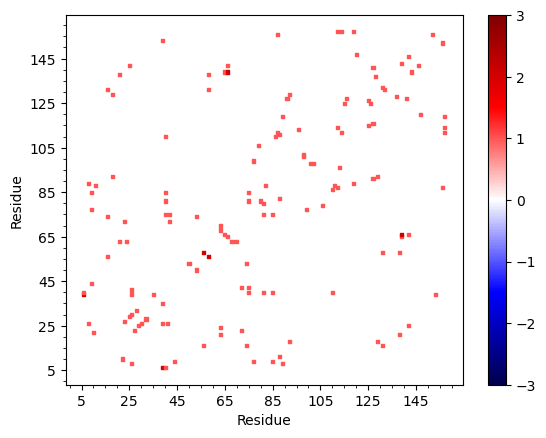

In [27]:
import matplotlib.pylab as plt

showAtomicMatrix(matrix, atoms=atoms.ca, cmap='seismic', markersize=5)
plt.xlabel('Residue')
plt.ylabel('Residue')
plt.clim([-3,3])

The total number of interaction for each residue can be displayed on the plot using
:func:`.showCumulativeInteractionTypes()` function.

@> Calculating interactions
@> Calculating interactions
@> Calculating interactions
@> Calculating interactions
@> Calculating interactions
@> Calculating interactions
@> Calculating interactions


(array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 0., 0.,
        2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
        0., 2., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 2.,
        0.

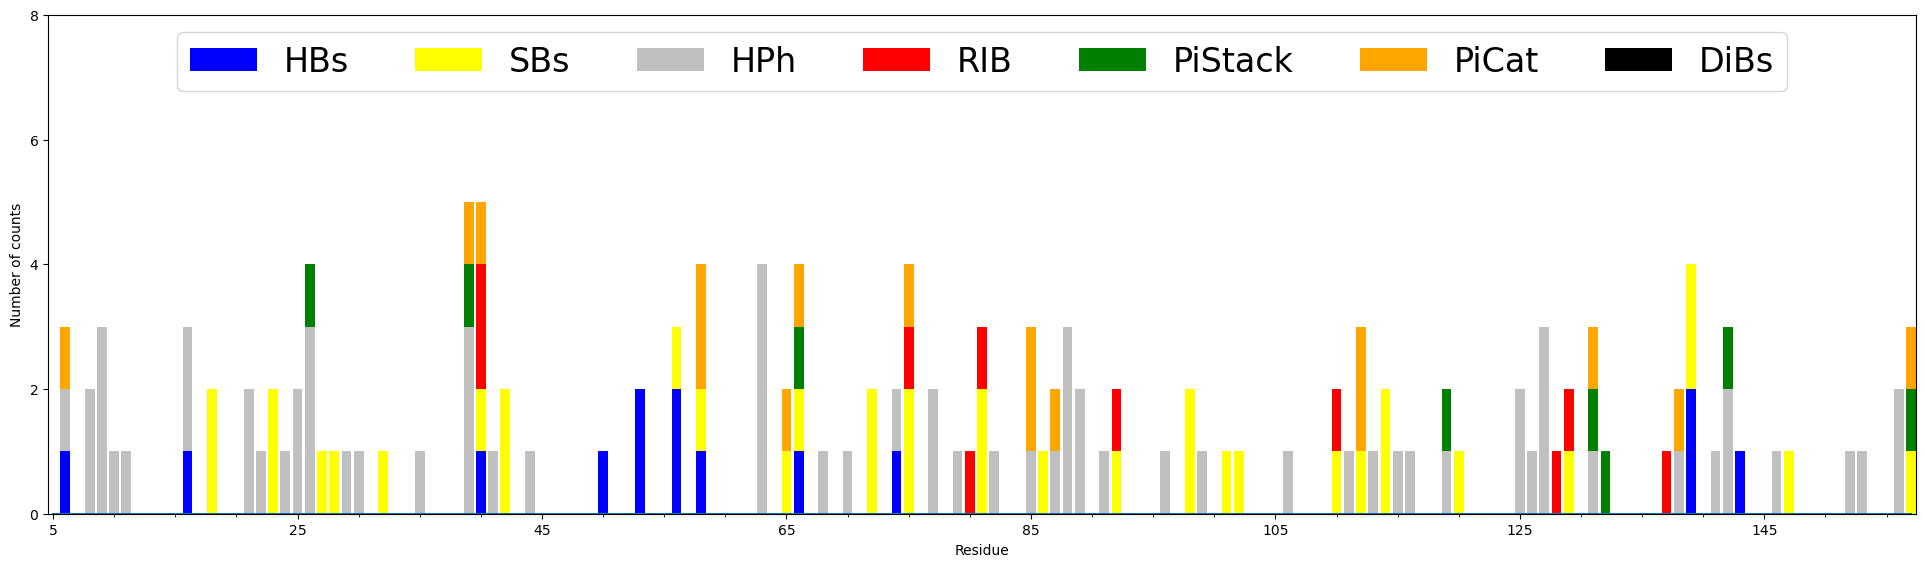

In [28]:
interactions.showCumulativeInteractionTypes()

The results with the higest number of possible contacts can be saved in PDB
file. They will be restored in Occupancy column and display in VMD_.

In [29]:
interactions.saveInteractionsPDB(filename='5kqm_meanMatrix.pdb')

@> PDB file saved.


# Exclude one type of interactions

In [30]:
matrix = interactions.buildInteractionMatrix(RIB=0, HBs=0, HPh=0, DiBs=0)

@> Calculating interactions


@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


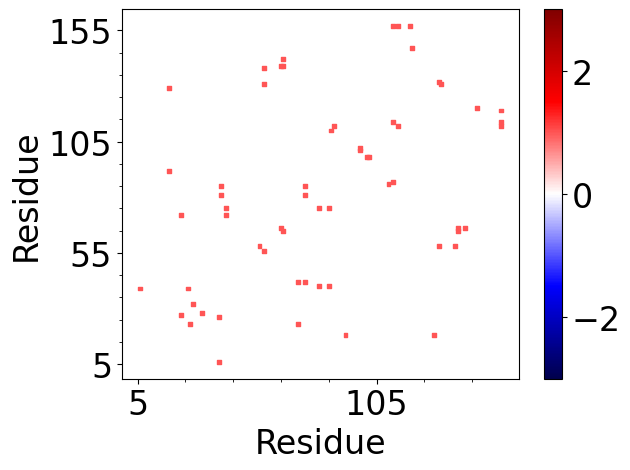

In [31]:
showAtomicMatrix(matrix, atoms=atoms.ca, cmap='seismic', markersize=8)
plt.xlabel('Residue')
plt.ylabel('Residue')
plt.clim([-3,3])

@> Calculating interactions
@> Calculating interactions
@> Calculating interactions
@> Calculating interactions
@> Calculating interactions
@> Calculating interactions
@> Calculating interactions


(array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 0., 0.,
        2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
        0., 2., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 2.,
        0.

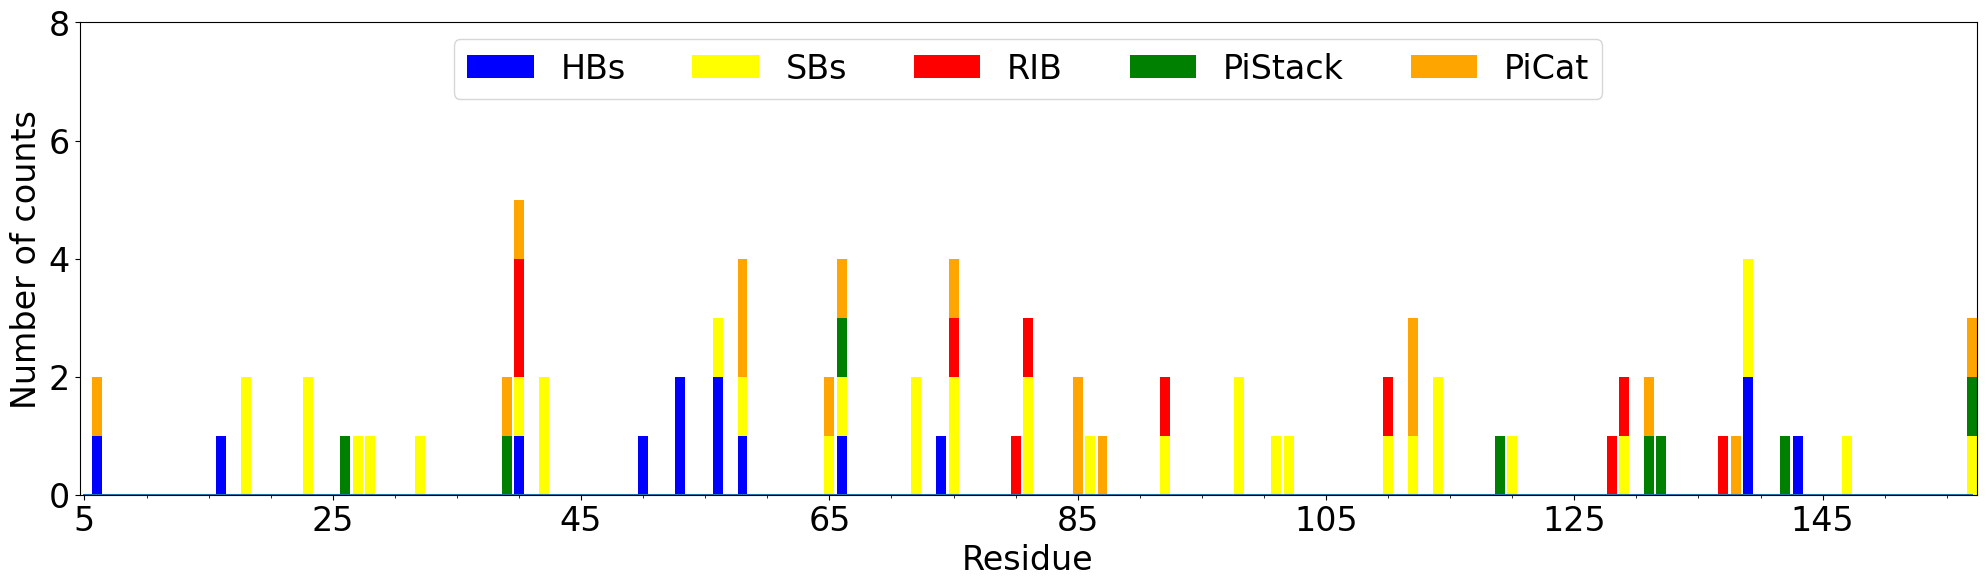

In [32]:
interactions.showCumulativeInteractionTypes(HPh=0, DiBs=0)